In [1]:
import xarray as xr
import numpy as np

# Load the dataset (replace 'your_dataset.nc' with the path to your dataset)
file_path = "/Users/ayush/Desktop/Final_Report/code/test.nc"  # Update this with your dataset file path
data = xr.open_dataset(file_path)

# Print dataset details
print("Dataset Details:")
print(data)

# Extract spatial resolution
latitudes = data['latitude'].values
longitudes = data['longitude'].values

lat_resolution = np.abs(latitudes[1] - latitudes[0])  # Latitude resolution
lon_resolution = np.abs(longitudes[1] - longitudes[0])  # Longitude resolution

print("\nSpatial Resolution:")
print(f"Latitude Resolution: {lat_resolution} degrees")
print(f"Longitude Resolution: {lon_resolution} degrees")

# Calculate total number of pixels
num_lat = len(latitudes)
num_lon = len(longitudes)
total_pixels = num_lat * num_lon

print("\nGrid Information:")
print(f"Number of Latitude Points: {num_lat}")
print(f"Number of Longitude Points: {num_lon}")
print(f"Total Pixels: {total_pixels}")

# Check time range
time_range = data['time'].values
print("\nTime Range:")
print(f"Start Time: {time_range[0]}")
print(f"End Time: {time_range[-1]}")

# Close the dataset
data.close()

Dataset Details:
<xarray.Dataset>
Dimensions:    (latitude: 61, longitude: 101, time: 14610)
Coordinates:
    number     int64 ...
  * latitude   (latitude) float64 45.0 44.0 43.0 42.0 ... -13.0 -14.0 -15.0
  * longitude  (longitude) float64 35.0 36.0 37.0 38.0 ... 133.0 134.0 135.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-17T04:46 GRIB to CDM+CF via cfgrib-0.9.1...

Spatial Resolution:
Latitude Resolution: 1.0 degrees
Longitude Resolution: 1.0 degrees

Grid Information:
Number of Latitude Points: 61
Number of Longitude Points: 101
Total Pixels: 6161

Time Range:
Start Time: 1979

In [2]:
data['t2m'] = data['t2m'] - 273.15

In [3]:
print(data['t2m'].isnull().sum())  # Count missing values

<xarray.DataArray 't2m' ()>
array(0)
Coordinates:
    number   int64 ...


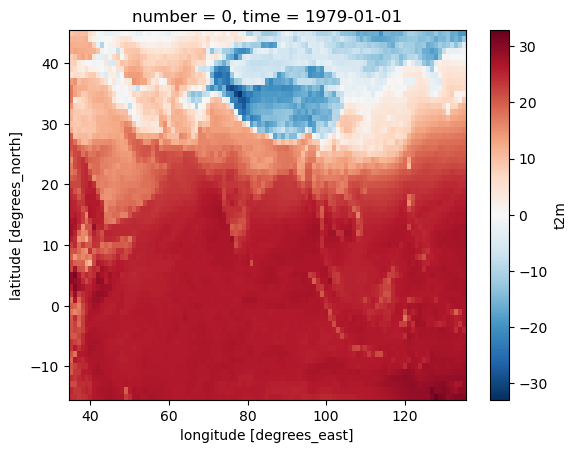

In [5]:
data['t2m'].isel(time=0).plot()
plt.show()

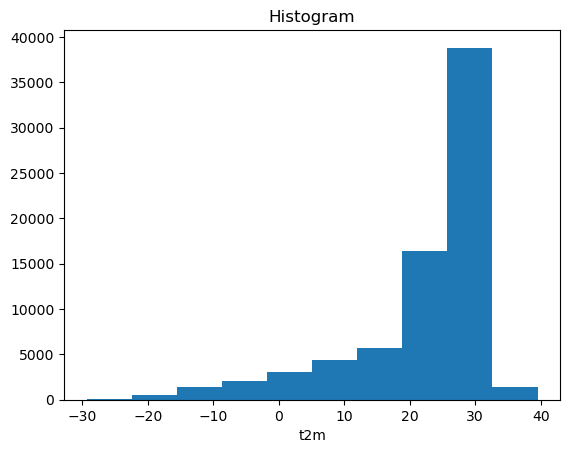

In [6]:
data['t2m'].groupby('time.month').mean().plot()
plt.show()

In [7]:
heatwave_durations = data['heatwave_duration'].values  # Replace with your heatwave duration variable
plt.hist(heatwave_durations, bins=30)
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Heatwave Durations')
plt.show()

KeyError: 'heatwave_duration'

In [10]:
### Imports ###
import argparse
import numpy as np
import pandas as pd
import deepgraph as dg
import con_sep as cs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import os

### Functions ###

# Ensure the output directory exists
def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Assign seasons based on day of year
def assign_season(doy):
    if 1 <= doy <= 59 or 335 <= doy <= 365:
        return "Winter"
    elif 60 <= doy <= 151:
        return "Spring"
    elif 152 <= doy <= 243:
        return "Summer"
    elif 244 <= doy <= 334:
        return "Autumn"
    else:
        return np.nan  # Handle invalid days

### Argparser ###

def make_argparser():
    parser = argparse.ArgumentParser()
    parser.add_argument("-d", "--data", help="Give the path to the original dataset to be worked on.",
                        type=str)
    return parser

parser = make_argparser()
args = parser.parse_args()
gv = pd.read_csv(args.data)
gv['time'] = pd.to_datetime(gv['time'])

# Add a day-of-year column
gv['doy'] = gv['time'].dt.dayofyear

# Assign seasons
gv['season'] = gv['doy'].apply(assign_season)

# Perform clustering for each season
output_dir = '/Users/ayush/Desktop/Final_Report/plots/'
ensure_directory_exists(output_dir)

seasons = ["Winter", "Spring", "Summer", "Autumn"]

for season in seasons:
    print(f"Processing {season}...")
    
    # Filter data for the current season
    season_data = gv[gv['season'] == season]
    
    # Transform day of year value for clustering
    season_data['doy_cos'] = np.cos((season_data['doy'] * 2 * np.pi) / 365)
    season_data['doy_sin'] = np.sin((season_data['doy'] * 2 * np.pi) / 365)
    
    # Perform k-means clustering
    k = 4  # Number of clusters for each season
    clusterer = KMeans(n_clusters=k, random_state=100)
    cluster_labels = clusterer.fit_predict(season_data[['doy_cos', 'doy_sin']])
    season_data['kmeans_clust'] = cluster_labels
    
    # Save the clustering results
    season_data.to_csv(f"{output_dir}{season}_clustering.csv", index=False)
    
    # Plot the clustering results
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax.scatter(season_data['doy_cos'], season_data['doy_sin'], marker=".", s=50, lw=0, alpha=0.7, c=colors, edgecolor="k")
    ax.set_title(f'{season} Clustering (k={k})')
    ax.set_xlabel('doy_cos')
    ax.set_ylabel('doy_sin')
    plt.savefig(f"{output_dir}{season}_clustering.png")
    plt.close()

print("Seasonal clustering completed!")

ModuleNotFoundError: No module named 'con_sep'

NameError: name 'null' is not defined

In [ ]:
import pandas as pd

# Load the dataset
gv = pd.read_csv('/Users/ayush/Desktop/Final_Report/clustering/gv_fam0.csv')

# Find the unique families
unique_families = gv['F_upgma'].unique()
print(f"Unique families: {unique_families}")
print(f"Number of families: {len(unique_families)}")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ayush/Desktop/Final_Report/clustering/v_fam0.csv'